# Search-based planning algorithms


***Como un agente puede encontrar una secuencia de acciones para lograr sus metas***

An agent is anything that can be viewed as perceiving its environment through sensors and
SENSOR acting upon that environment through actuators.

## Example problems

### Route finding problem 
airline travel-planning systems, route streams in a computer netwoork, car driving, robot navigation. 

- **States** are locations
- **Initial state** is specified by user's query
- **Actions** advance from current location
- **Goal test** is the final destination
- **Path cost** depends monetary cost, waiting time, distance of path, and so on

## Well-defined problems and solutions

- **Initial state** where the agent start

- Description of possible **actions**. Given a particular state $s$, which particular action $a$ can the agent do. 

- Description of what each action does, this is named **transition model**
    -Result(S, a)-> return a state
- States, actions, and transition model define the **state space** as a graph: nodes are states and links actions. 
- A **path** is a sequence of states connected by actions. 
- The **goal test** determine the final state the will be achieved. 
- A **path cost** function that assigns a numeric cost to each path

## Robot navigation problem

Solving this problem is important because autonomous robots require the ability to plan its path to reach a goal.

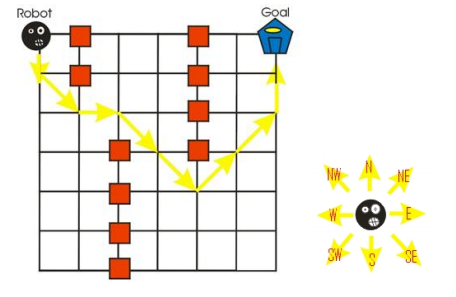

In [1]:
from IPython.display import Image
Image(filename='../imgs/robot_comic1.png', width=300)

## Noninformed algorithms

In this lesson we will to study two noninformed different algorithms: **Breath First Search** and **Depth First Search**

***We assume that robot doest not have any artifitial vision sensor. The robot only is able to move in local directions, one position at time, and detect if position is goal or not***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
EMPTY, WALL, TARGET, USED = ".","X","T","o"
c  = pd.Series({"EMPTY": ".", "WALL":"X", "TARGET":"T", "USED":"o"})
ci = pd.Series({".": 0, "X": 255, "T":100, "o":200})

def plot_map(grid,p=[]):
    img = np.r_[[[ci[i] for i in j] for j in grid]]
    print "img", img
    plt.imshow(img, alpha=.5)
    if(len(p)>0):
        for i in range(len(p)-1):
            plt.plot([p[i][1],p[i+1][1]],[p[i][0],p[i+1][0]], color="black", lw=4)    
        plt.title("path length = %d"%len(p))
        
    plt.xticks(range(img.shape[1]), range(img.shape[1]))
    plt.yticks(range(img.shape[0]), range(img.shape[0]))
    
def possible_moves(grid, y,x):
    moves = [ [y,x+1], [y-1,x], [y,x-1], [y+1,x]]
    
    moves = [(my,mx) for my,mx in moves if mx>=0 and mx<len(grid[0]) and \
                                           my>=0 and my<len(grid) and grid[my][mx]!=c.WALL]    
    return moves
    

Lets try with an example of grid...

img [[  0   0   0   0   0 255]
 [255 255   0   0   0 255]
 [  0   0   0 255   0   0]
 [  0 255 255   0   0 255]
 [  0 255   0   0   0 100]]


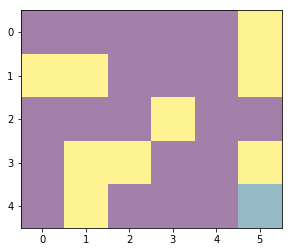

In [4]:
grid = [".....X",
        "XX...X",
        "...X..",
        ".XX..X",
        ".X...T"]

plot_map(grid)

# Breath First Search

This is **breadth first**. We put the initial node into the queue. Then repeat this procedure until visit the goal node or visit all available nodes: take the first from the queue, check if it was visited or not, check if it's the goal, put all neighbours in the end of the queue, repeat. For each step we track not only the nodes, but directions and the path for the current node too.

- does it give the best answer?


See [here](http://bryukh.com/labyrinth-algorithms/).

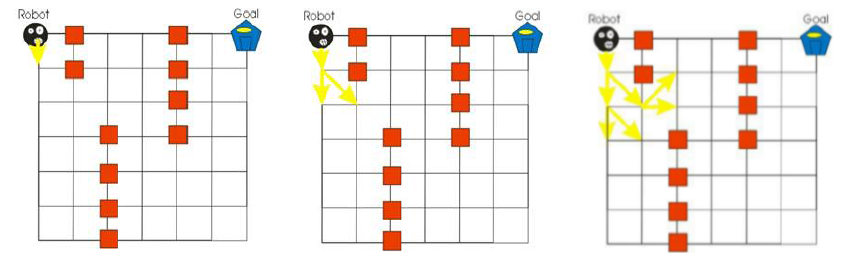

In [7]:
from IPython.display import Image
Image(filename='../imgs/robot_1.png', width=700)

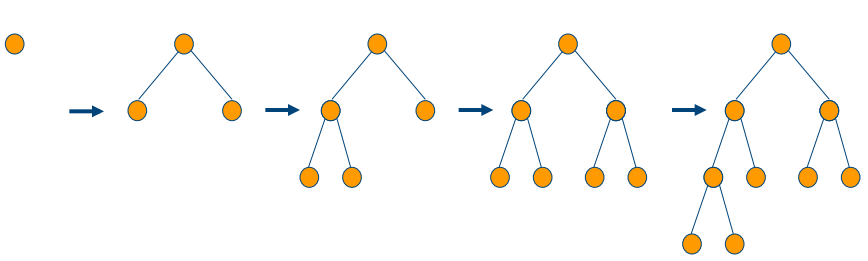

In [8]:
from IPython.display import Image
Image(filename='../imgs/BFS_tree.png', width=500)

In [9]:
from collections import deque

def bfs_search(grid, verbose=True):
    n_iterations   = 0
    max_queue_len  = 0
    start = (0, 0)
    queue = deque([([], start)])
    visited = set()
    while queue:
        n_iterations += 1
        max_queue_len = max_queue_len if len(queue) < max_queue_len else len(queue)
        path, (y,x) = queue.popleft()
        if grid[y][x] == c.TARGET:
            if verbose:
                print "n_iterations %d, max_queue_len %d"%(n_iterations, max_queue_len)
            return path+[(y,x)]
        if (y,x) in visited:
            continue
        visited.add((y,x))
        for move in possible_moves(grid,y,x):
            queue.append((path + [(y,x)], move))

    return []

n_iterations 39, max_queue_len 8
success True
img [[  0   0   0   0   0 255]
 [255 255   0   0   0 255]
 [  0   0   0 255   0   0]
 [  0 255 255   0   0 255]
 [  0 255   0   0   0 100]]


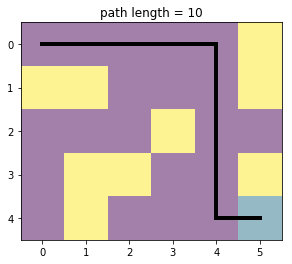

In [10]:
p=bfs_search(grid)
print "success", len(p)>0
plot_map(grid, p)

In [11]:
print p

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (4, 5)]


# Depth First Search

This is **depth first**. We simply use the other way around.

- Does it give the best answer?
- How is its computational complexity as compared with  BFS?

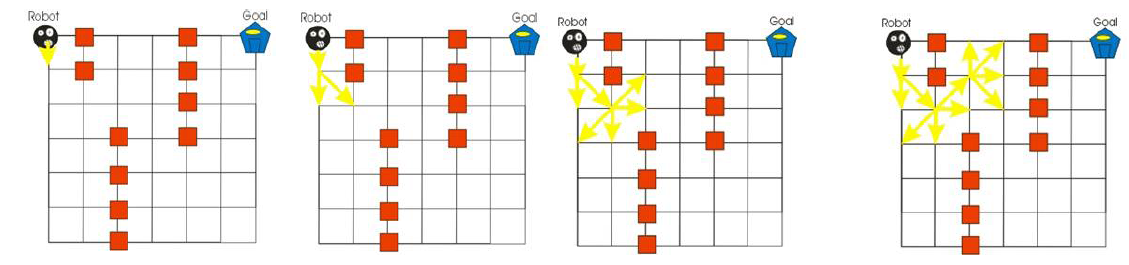

In [13]:
from IPython.display import Image
Image(filename='../imgs/robot_bfs.png')

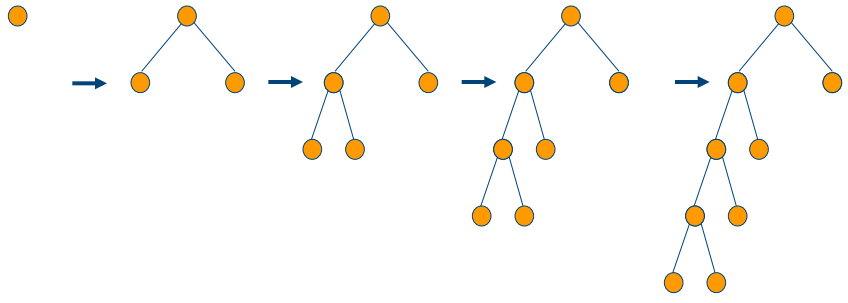

In [15]:
from IPython.display import Image
Image(filename='../imgs/DFS_tree.png', width=500)

In [16]:
from collections import deque

def dfs_search(grid, verbose=True):
    n_iterations   = 0
    max_queue_len  = 0
    start = (0, 0)
    queue = deque([([], start)])
    visited = set()
    while queue:
        n_iterations += 1
        max_queue_len = max_queue_len if len(queue) < max_queue_len else len(queue)
        path, (y,x) = queue.pop()
        if grid[y][x] == c.TARGET:
            if verbose:
                print "n_iterations %d, max_queue_len %d"%(n_iterations, max_queue_len)
            return path+[(y,x)]
        if (y,x) in visited:
            continue
        visited.add((y,x))
        for move in possible_moves(grid,y,x):
            queue.append((path + [(y,x)], move))
    return []

In [18]:
grid = generate_maze(size=(10,20))
plot_map(grid)
print possible_moves(grid, 1,1)

NameError: name 'generate_maze' is not defined

n_iterations 170, max_queue_len 52
success True


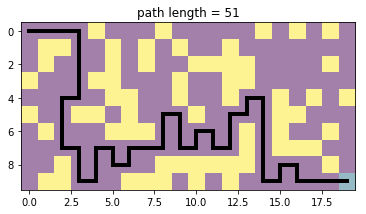

In [85]:
p=dfs_search(grid)
print "success", len(p)>0
plot_map(grid, p)

img [[  0   0   0 ...,   0   0   0]
 [255   0   0 ...,   0 255   0]
 [255   0 255 ...,   0 255   0]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0 255 255 ...,   0   0   0]
 [255 255   0 ..., 255   0 100]]


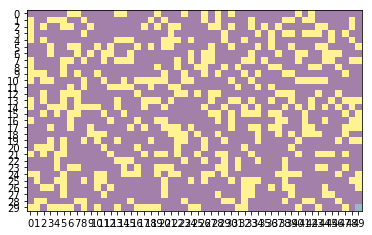

In [27]:
def generate_maze(size):
    grid = (np.random.random(size=size)>.7)*1
    grid = [[c.WALL if grid[x,y] else c.EMPTY for y in range(grid.shape[1])] for x in range(grid.shape[0])]
    grid[-1][-1]=c.TARGET
    return grid
grid = generate_maze(size=(30,50))
plot_map(grid)

n_iterations 2681, max_queue_len 79
success True
10 loops, best of 3: 69.7 ms per loop
img [[  0   0   0 ...,   0   0   0]
 [255   0   0 ...,   0 255   0]
 [255   0 255 ...,   0 255   0]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0 255 255 ...,   0   0   0]
 [255 255   0 ..., 255   0 100]]


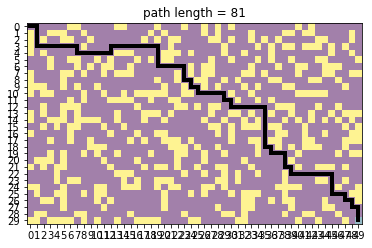

In [28]:
p_bfs = bfs_search(grid)
print "success", len(p_bfs)>0
%timeit bfs_search(grid, verbose=False)
plot_map(grid, p_bfs)

n_iterations 1511, max_queue_len 417
success True
10 loops, best of 3: 45.5 ms per loop
img [[  0   0   0 ...,   0   0   0]
 [255   0   0 ...,   0 255   0]
 [255   0 255 ...,   0 255   0]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0 255 255 ...,   0   0   0]
 [255 255   0 ..., 255   0 100]]


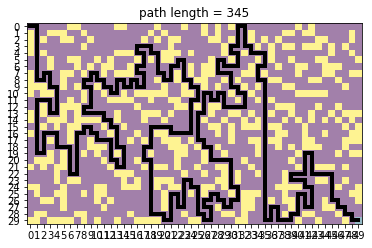

In [29]:
p_dfs = dfs_search(grid)
print "success", len(p_dfs)>0
%timeit dfs_search(grid, verbose=False)
plot_map(grid, p_dfs)

### let's shorten the answer of DFS

- is it now the best answer?

In [30]:
pp = np.r_[p_dfs]
i=0
while i<len(pp):
    for k in range(i+2, len(pp)):
        if np.sum(np.abs(pp[i]-pp[k]))==1:
            pp = np.concatenate((pp[:i+1], list(pp[k:])))
            break
    i+=1

img [[  0   0   0 ...,   0   0   0]
 [255   0   0 ...,   0 255   0]
 [255   0 255 ...,   0 255   0]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0 255 255 ...,   0   0   0]
 [255 255   0 ..., 255   0 100]]


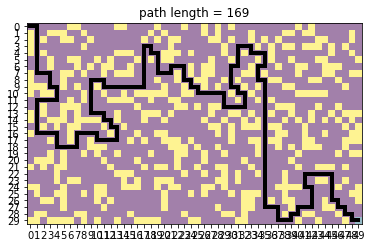

In [31]:
plot_map(grid, pp)

observe computing times. larger mazes makes DFS more iterations (but slower due to data structures which should be improved)

In [32]:
grid = generate_maze(size=(10,20))
%timeit bfs_search(grid, verbose=False)
%timeit dfs_search(grid, verbose=False)

print "bfs solution len", len(bfs_search(grid))
print "dfs solution len", len(dfs_search(grid))

100 loops, best of 3: 7.27 ms per loop
100 loops, best of 3: 4.4 ms per loop
bfs solution len n_iterations 241, max_queue_len 20
31
dfs solution len n_iterations 141, max_queue_len 49
53


In [33]:
grid = generate_maze(size=(20,30))
%timeit bfs_search(grid, verbose=False)
%timeit dfs_search(grid, verbose=False)

print "bfs solution len", len(bfs_search(grid))
print "dfs solution len", len(dfs_search(grid))

10 loops, best of 3: 20.1 ms per loop
100 loops, best of 3: 15.7 ms per loop
bfs solution len n_iterations 761, max_queue_len 46
49
dfs solution len n_iterations 558, max_queue_len 121
99


In [34]:
grid = generate_maze(size=(50,50))
%timeit bfs_search(grid, verbose=False)
%timeit dfs_search(grid, verbose=False)

print "bfs solution len", len(bfs_search(grid))
print "dfs solution len", len(dfs_search(grid))

10000 loops, best of 3: 87.4 µs per loop
10000 loops, best of 3: 87.2 µs per loop
bfs solution len 0
dfs solution len 0


### "Although some of these algorithms can solve any solvable problem, none of them can do so efficiently"

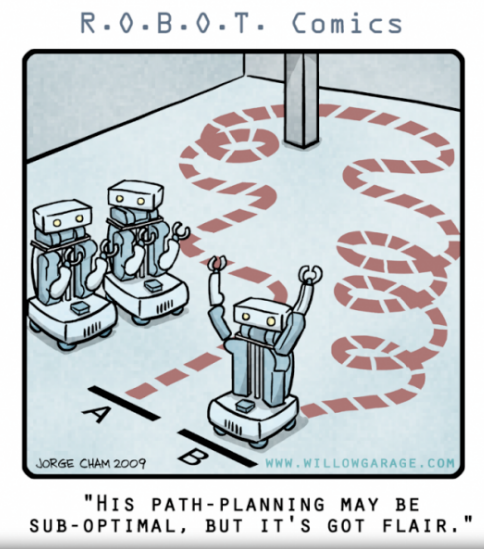

In [25]:
from IPython.display import Image
Image(filename='../imgs/robot_comic.png',  width=300)